In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('titanic-1.csv',usecols=['Age','Survived'])
data.head()

,Survived,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [7]:
data['Age'].isnull().sum()

np.int64(86)

In [8]:
data['Age']=np.where(data['Age'].isnull(),data['Age'].mean(),data['Age'])

In [9]:
data['Age'].isnull().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

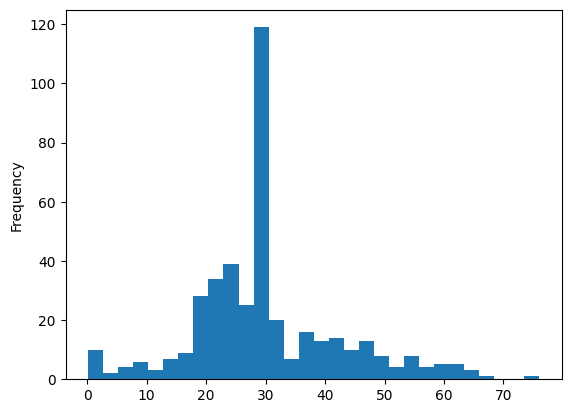

In [10]:
data['Age'].plot.hist(bins=30)

In [11]:
maxrange = int(np.ceil(max(data['Age'])))
minrange = int(np.floor(min(data['Age'])))
ageRange = maxrange - minrange
bins = 10
binwidth = int(np.round(ageRange/bins))

In [12]:
print("Rango max:",maxrange)
print("Rango min:",minrange)
print("Rango:",ageRange)
print("Ancho de los grupos:",binwidth)

Rango max: 76
Rango min: 0
Rango: 76
Ancho de los grupos: 8


In [13]:
intervalos = [ age for age in range(minrange, maxrange+binwidth, binwidth)]
intervalos

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

In [14]:
binlabels = ["gpoA",'gpoB','gpoC','gpoD','gpoE','gpoF','gpoG','gpoH','gpoI','gpoJ']
binlabels

['gpoA',
 'gpoB',
 'gpoC',
 'gpoD',
 'gpoE',
 'gpoF',
 'gpoG',
 'gpoH',
 'gpoI',
 'gpoJ']

In [15]:
data["age_categ"]=pd.cut(data["Age"],bins = 
                         intervalos, labels = binlabels, include_lowest=True)

In [16]:
data["age_categ"]

0      gpoE
1      gpoF
2      gpoH
3      gpoD
4      gpoC
       ... 
413    gpoD
414    gpoE
415    gpoE
416    gpoD
417    gpoD
Name: age_categ, Length: 418, dtype: category
Categories (10, object): ['gpoA' < 'gpoB' < 'gpoC' < 'gpoD' ... 'gpoG' < 'gpoH' < 'gpoI' < 'gpoJ']

C:\Users\dilan\AppData\Local\Temp\ipykernel_17412\2378944603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("age_categ")['Age'].count().plot.bar()


Text(0, 0.5, 'conteo de observaciones')

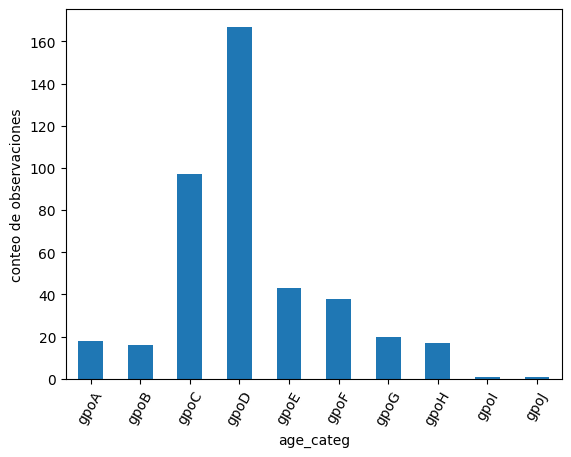

In [17]:
data.groupby("age_categ")['Age'].count().plot.bar()
plt.xticks(rotation=60)
plt.ylabel('conteo de observaciones')